In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, io
from pandas import Series, DataFrame, read_table
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Data Analysis and Exploration


## User Data


### Exploratory Data Analysis:

Load the Users data into a data frame


In [51]:
df_users = pd.read_csv("BX-Users.csv", delimiter=",", encoding="latin-1")
df_users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [52]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB
None


In [53]:
print(df_users.isnull().sum())

user_id          0
Location         1
Age         110763
dtype: int64


In [54]:
print("Number of unique user features:\n")
print(df_users.nunique())

Number of unique user features:

user_id     278859
Location     57339
Age            165
dtype: int64


Rename the columns to all lower case


In [61]:
# change the columns names of df_users
def rename_columns(df_users):
    df_users.columns = ["userid", "location", "age"]
    return df_users


df_users = rename_columns(df_users)

In [62]:
df_users["userid"] = pd.to_numeric(df_users["userid"], errors="coerce")
df_users = df_users.sort_values(by=["userid"])
df_users.reset_index(drop=True, inplace=True)
df_users.head()

,userid,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [63]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userid    278858 non-null  float64
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.4+ MB


In [64]:
print(df_users.describe(include="all"))

              userid                         location            age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                              NaN       0.000000
25%      69715.25000                              NaN      24.000000
50%     139429.50000                              NaN      32.000000
75%     209143.75000                              NaN      44.000000
max     278858.00000                              NaN     244.000000


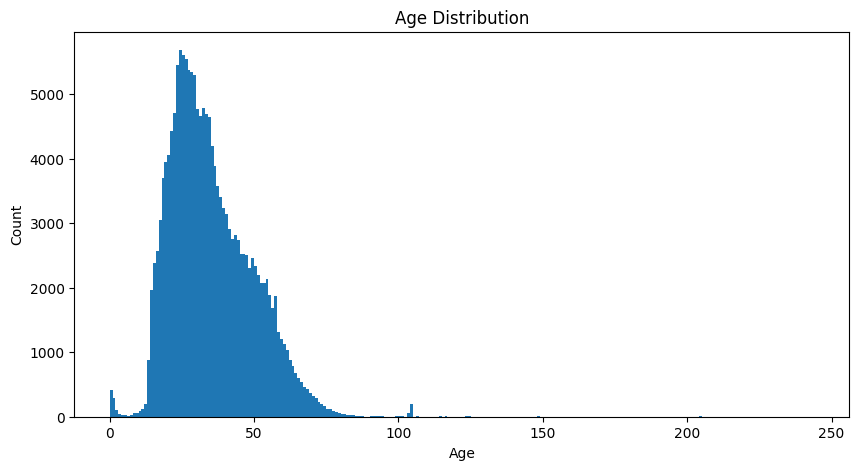

In [65]:
# Plot the age distribution of users
def plot_age_distribution(df):
    plt.figure(figsize=(10, 5))
    plt.hist(
        df["age"], bins=np.arange(df["age"].min(), df["age"].max() + 1), color="purple"
    )
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age Distribution")
    plt.show()


plot_age_distribution(df_users)

## Book Data


### Exploratory Data Analysis


In [3]:
df_books = pd.read_csv("BX-Books.csv", delimiter=",", encoding="latin-1")
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
print(df_books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271377 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB
None


In [5]:
df_books.isna().any()

isbn                   False
book_title             False
book_author             True
year_of_publication    False
publisher               True
dtype: bool

In [6]:
print(df_books.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64


In [7]:
books_unique_values = df_books.nunique()
print(books_unique_values)

Number of unique isbn: 271379


### Data Preparation


In [9]:
df_books.columns = ["isbn", "title", "author", "year", "publisher"]

In [10]:
df_books = df_books.sort_values(by=["title", "isbn"], ascending=[0, 1])
df_books.reset_index(drop=True, inplace=True)

In [11]:
df_books["year"] = pd.to_numeric(df_books["year"], errors="coerce")

In [12]:
df_books.head()

,isbn,title,author,year,publisher
0,2842192508,Ã?Â?thique en toc,Didier Daeninckx,1998.0,Baleine
1,3442725739,Ã?Â?stlich der Berge.,David Guterson,2000.0,btb
2,3451274973,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001.0,"Herder, Freiburg"
3,325721538X,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987.0,Diogenes Verlag
4,3499232499,Ã?Â?lpiraten.,Janwillem van de Wetering,2002.0,Rowohlt Tb.


In [15]:
df_books["year"] = df_books["year"].fillna(0).astype(np.int32)
df_books.head()

,isbn,title,author,year,publisher
0,2842192508,Ã?Â?thique en toc,Didier Daeninckx,1998,Baleine
1,3442725739,Ã?Â?stlich der Berge.,David Guterson,2000,btb
2,3451274973,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg"
3,325721538X,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987,Diogenes Verlag
4,3499232499,Ã?Â?lpiraten.,Janwillem van de Wetering,2002,Rowohlt Tb.


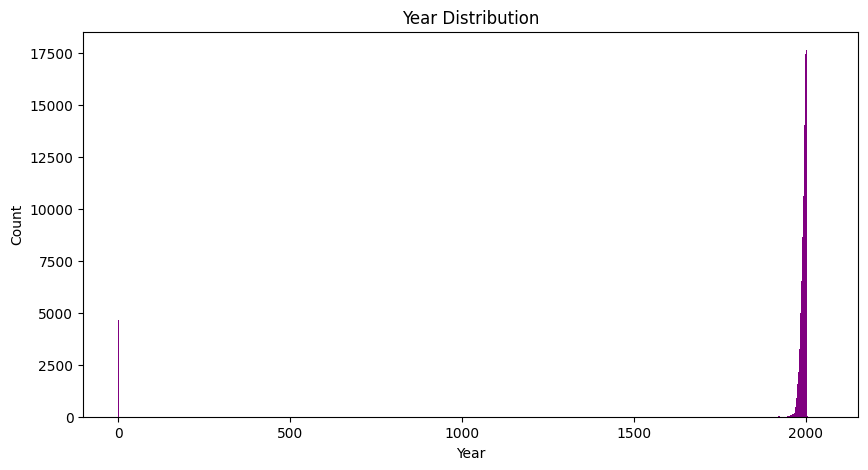

In [21]:
# plot the year distribution of books
def plot_year_distribution(df):
    plt.figure(figsize=(10, 5))
    plt.hist(
        df["year"],
        bins=np.arange(df["year"].min(), df["year"].max() + 1),
        color="purple",
    )
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title("Year Distribution")
    plt.show()


plot_year_distribution(df_books)

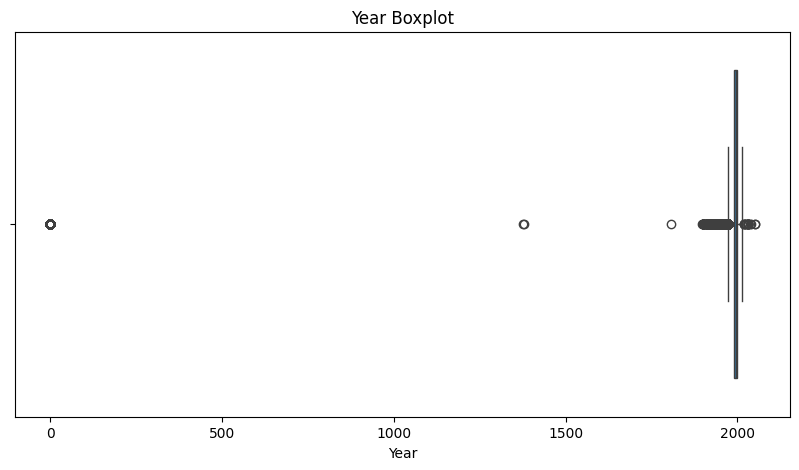

In [20]:
# plot a boxplot of year
def plot_year_boxplot(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["year"])
    plt.xlabel("Year")
    plt.title("Year Boxplot")
    plt.show()


plot_year_boxplot(df_books)

## Ratings Data


### Exploratory Data Analysis


In [22]:
df_ratings = pd.read_csv("BX-Book-Ratings.csv", delimiter=",", encoding="latin-1")

In [23]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [24]:
print(df_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


In [ ]:
nunique_rating_user_id = df_ratings["user_id"].nunique()
print(f"Unique number of user_id: {nunique_rating_user_id}")

unique_rating_isbn = df_ratings["isbn"].nunique()
print(f"Unique number of isbn: {unique_rating_isbn}")

In [ ]:
df_ratings.isnull().sum()

In [ ]:
sns.displot(df_ratings["rating"], kde=True)

### Data Preparation


In [ ]:
df_ratings = df_ratings[df_ratings["rating"] != 0]

In [ ]:
df_ratings.head()

In [ ]:
# df_ratings = df_ratings[df_ratings["rating"] > 4]
# df_ratings.head()

In [ ]:
df_book_ratings = pd.merge(df_ratings, df_books, on="isbn")
df_book_ratings = df_book_ratings[["user_id", "isbn", "book_title", "rating"]]
df_book_ratings = df_book_ratings.sort_values(
    ["isbn", "book_title"], ascending=[0, 0]
).reset_index(drop=True)

df_book_ratings.head()

In [ ]:
df_book_ratings.info()

In [ ]:
user_id_idx_map = {
    user: i for i, user in enumerate(df_book_ratings["user_id"].unique())
}

In [ ]:
df_book_ratings["user_id_idx"] = df_book_ratings["user_id"].map(user_id_idx_map)

In [ ]:
df_book_ratings.head()

In [ ]:
isbn_idx_map = {isbn: i for i, isbn in enumerate(df_book_ratings["isbn"].unique())}

In [ ]:
df_book_ratings["isbn_idx"] = df_book_ratings["isbn"].map(isbn_idx_map)

In [ ]:
df_book_ratings.head()

In [ ]:
df_book_ratings.sort_values(by=["user_id_idx", "isbn_idx"], inplace=True)
df_book_ratings.reset_index(drop=True, inplace=True)

In [ ]:
df_book_ratings.head()

In [ ]:
ratings_matrix = df_book_ratings.pivot_table(
    index="user_id_idx", columns="isbn_idx", values="rating"
).reset_index(drop=True)

In [ ]:
ratings_matrix.head()

In [ ]:
ratings_matrix.info()

In [ ]:
# get the column names of the ratings matrix
isbn_idx_7 = ratings_matrix[7]
isbn_idx_7.head()

In [ ]:
isbn_idx_7.info()

In [ ]:
similarbooks = ratings_matrix.corrwith(isbn_idx_7)
similarbooks = similarbooks.dropna()
df = pd.DataFrame(similarbooks)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the ratings matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    ratings_matrix.index, ratings_matrix.values, test_size=0.25
)